In [55]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import requests, zipfile, StringIO
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# IDEA

**Young people are more likely to use bikes to commute compared to older people.**

# NULL HYPOTHESIS

**The ratio of people aged 21-40 biking on weekdays to people aged 21-40 biking on weekends is _equal_ or _lower_ than the ration of people aged 41-60 biking on weekdays to people aged 41-60 biking on weekends.**

_The hypothesis is going to be tested at 5% significance level (a=0.05)._

In [63]:
datestring = '201503'
r = requests.get('https://s3.amazonaws.com/tripdata/'+datestring + '-citibike-tripdata.zip')
z = zipfile.ZipFile(StringIO.StringIO(r.content))

df= pd.read_csv(z.open(datestring+'-citibike-tripdata.csv'))
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [64]:
df['date'] = pd.to_datetime(df['starttime'])

In [69]:
df['age'] = 2015 - df['birth year']
df = df[['age', 'date']]
df.head()

,age,date
0,28.0,2015-03-01 00:00:00
1,47.0,2015-03-01 00:01:00
2,NaN,2015-03-01 00:01:00
3,32.0,2015-03-01 00:02:00
4,45.0,2015-03-01 00:02:00


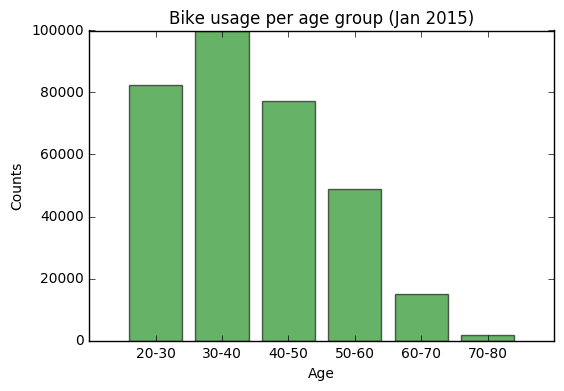

In [144]:
bins = np.arange(20, 90, 10)
df_ages = df.groupby(pd.cut(df.age, bins))
objects = ('20-30', '30-40', '40-50', '50-60', '60-70', '70-80')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_ages.age.count(), align='center', alpha=0.6, color = 'g')
plt.xticks(y_pos, objects)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Bike usage per age group (Jan 2015)')
plt.show()

## Figure 1:

Shows shows the bike usage by age group (January 2015).

People aged between 30-40 are the group that has checked out more bikes for this particular period.

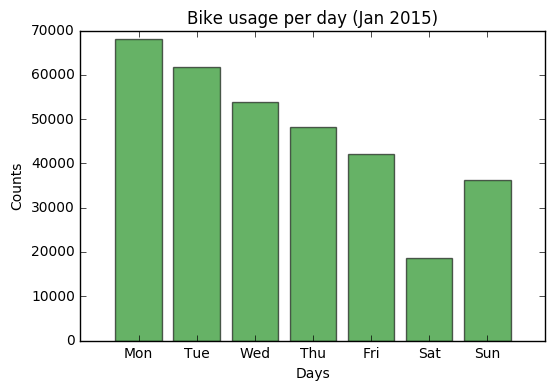

In [143]:
df_weekdays = df.groupby([df['date'].dt.weekday]).count()

objects = ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')
y_pos = np.arange(len(objects))
plt.bar(y_pos, df_weekdays.age, align='center', alpha=0.6, color = 'g')
plt.xticks(y_pos, objects)
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Bike usage per day (Jan 2015)')
plt.show()

## Figure 2:

Shows shows the bike usage by day (January 2015).

During weekdays more bikes are checked out, with Saturday being the day with the lower number of checkouts.

In [191]:
young = df[(df.age<41) & (df.age>19)].groupby([df.date.dt.weekday]).count()
error_y=np.sqrt(young)
norm_y = young.sum()

young_weekday = young.age[0:5]
error_y_weekday=np.sqrt(young_weekday)
norm_y_weekday = young_weekday.sum()

young_weekend = young.age[5:7]
error_y_weekend=np.sqrt(young_weekend)
norm_y_weekend = young_weekend.sum()

old = df[(df.age>40) & (df.age<61)].groupby([df.date.dt.weekday]).count()
error_o=np.sqrt(old)
norm_o = old.sum()

old_weekday = old.age[0:5]
error_o_weekday=np.sqrt(old_weekday)
norm_o_weekday = old_weekday.sum()

old_weekend = old.age[5:7].sum()
error_o_weekend=np.sqrt(old_weekend)
norm_o_weekend = old_weekend.sum()

In [206]:
week_y = norm_y_weekday * 1.0 / norm_y
weekend_y = norm_y_weekend * 1.0 / norm_y
eweek_y = np.sqrt(np.sum(error_y_weekday**2.0)) / norm_y
eweekend_y = np.sqrt(np.sum(error_y_weekend**2.0)) / norm_y

week_o = norm_o_weekday * 1.0 / norm_o
weekend_o = norm_o_weekend * 1.0 / norm_o
eweek_o = np.sqrt(np.sum(error_o_weekday**2)) / norm_o
eweekend_o = np.sqrt(np.sum(error_o_weekend**2)) / norm_o

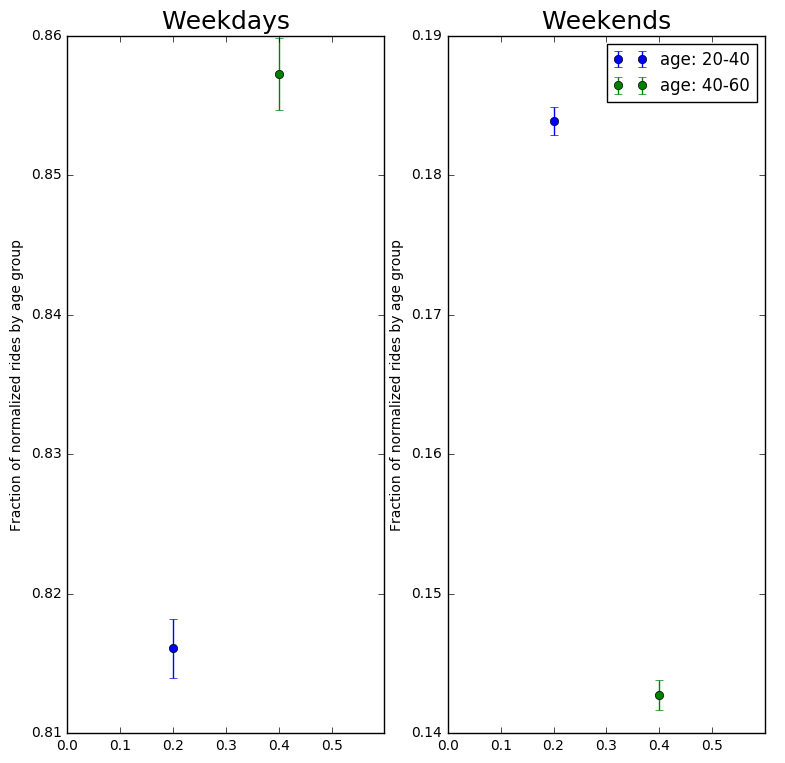

In [253]:
plt.figure(figsize = (9,9))
plt.subplot(121)
plt.title('Weekdays', fontsize=18)
plt.ylabel('Fraction of normalized rides by age group')
plt.errorbar([0.2], [week_y.age],yerr=[eweek_y.age], fmt = 'o', color = 'b', label = 'age: 20-40')
plt.errorbar([0.4], [week_o.age],yerr=[eweek_o.age], fmt = 'o', color = 'g', label = 'age: 40-60')
plt.xlim([0,0.6])
plt.subplot(122)
plt.title('Weekends', fontsize=18)
plt.ylabel('Fraction of normalized rides by age group')
plt.errorbar([0.2], [weekend_y.age],yerr=[eweekend_y.age], fmt = 'o', color = 'b', label = 'age: 20-40')
plt.errorbar([0.4], [weekend_o.age],yerr=[eweekend_o.age], fmt = 'o', color = 'g', label = 'age: 40-60')
plt.xlim([0,0.6])
plt.ylim([0.14, 0.19])
plt.legend()

## Figure 2:

Shows shows the fraction of normalized rides by age group, for weekdays (left) and weekends (right).